In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [358]:
class Perceptron:
    
    def __init__(self):
        self.b = None
        self.w = None
        
    def model(self, x):
        
        return int(np.dot(x, self.w) >= self.b)
        
    def predict(self, X):
        
        y_pred = []
        for x in X:
            y_pred.append(self.model(x))
            
        return y_pred
    
    def fit(self, X, Y, epoch = 2, alpha = 0.1):
        
        self.w = np.random.random(X.shape[1])
        self.b = np.random.random(1)
        accuracy = 0
        best_W = None
        best_b = None

        for i in range(epoch):
            
            y_pred = []
            
            for x, y in zip(X, Y):

                result = self.model(x)
                y_pred.append(result)
                
                self.update(result, x, y, alpha)

#             print(accuracy_score(y_pred, Y))
            acc = accuracy_score(y_pred, Y)
            if acc > accuracy:
                accuracy = acc
                best_W = self.w
                best_b = self.b
                
        print(accuracy)
        self.w = best_W
        
    def update(self, result, x, y, alpha):
        
        if result == 0 and  y == 1:
            self.w += alpha * x
            self.b -= alpha * 1

        if result == 1 and y == 0:
            self.w -= alpha * x
            self.b += alpha * 1
        

In [359]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [360]:
breast_cancer = load_breast_cancer()

In [361]:
data = breast_cancer.data
Y = breast_cancer.target
min_max = MinMaxScaler()
data = min_max.fit_transform(data)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 1, test_size = 0.3 , stratify = Y)

In [363]:
neuron = Perceptron()

In [401]:
neuron.fit(X_train, y_train, epoch=1000, alpha = 0.001)

0.9798994974874372


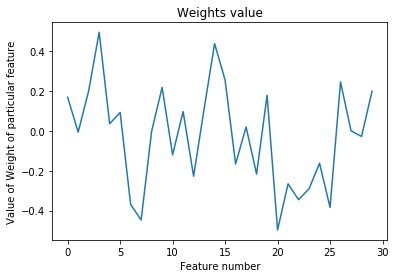

In [402]:
plt.plot(neuron.w, )
plt.title('Weights value')
plt.xlabel('Feature number')
plt.ylabel('Value of Weight of particular feature')
plt.show()

In [403]:
y_pred = neuron.predict(X_test)

In [404]:
accuracy_score(y_pred, y_test)

0.9649122807017544